In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.linalg import lstsq
from matplotlib.lines import Line2D
import cv2
from scipy.linalg import null_space

In [6]:
def obtain_h(x, x_prima):
    # compute h following the mathematics of the report
    a = [
    [x[0], x[1], 1, 0, 0, 0, -x[0]*x_prima[0], -x[1]*x_prima[0]],
    [0, 0, 0, x[0], x[1], 1, -x[0]*x_prima[1], -x[1]*x_prima[1]],
    [x[2], x[3], 1, 0, 0, 0, -x[2]*x_prima[2], -x[3]*x_prima[2]],
    [0, 0, 0, x[2], x[3], 1, -x[2]*x_prima[3], -x[3]*x_prima[3]],
    [x[4], x[5], 1, 0, 0, 0, -x[4]*x_prima[4], -x[5]*x_prima[4]],
    [0, 0, 0, x[4], x[5], 1, -x[4]*x_prima[5], -x[5]*x_prima[5]],
    [x[6], x[7], 1, 0, 0, 0, -x[6]*x_prima[6], -x[7]*x_prima[6]],
    [0, 0, 0, x[6], x[7], 1, -x[6]*x_prima[7], -x[7]*x_prima[7]]
    ]
    b = x_prima
    
    a_inverse = np.linalg.inv(a)

    # h = A^{-1}b
    h = np.dot(a_inverse, b)
    
    #Add known coefficient and reshape
    h = np.append(h, 1)
    h = h.reshape(3, 3)
    return h

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def project(img, homography_matrix, new_img_dims=(5000, 5000, -5000, -5000)):
    # Homography matrix and image dimensions
    H_matrix = np.asarray(homography_matrix)
    original_height, original_width, _ = img.shape
    new_height, new_width, y_offset, x_offset = new_img_dims

    # Create a grid for the new image dimensions
    y_grid, x_grid = np.indices((new_height, new_width))
    y_grid = y_grid + y_offset
    x_grid = x_grid + x_offset

    # Homogeneous coordinates for the new image
    homogeneous_coordinates = np.vstack([x_grid.ravel(), y_grid.ravel(), np.ones(x_grid.size)])

    # Apply the inverse homography
    H_inverse = np.linalg.inv(H_matrix)
    transformed_coordinates = H_inverse @ homogeneous_coordinates
    transformed_coordinates /= transformed_coordinates[2]

    # Integer coordinates for transformed pixels
    x_transformed = transformed_coordinates[0].astype(int)
    y_transformed = transformed_coordinates[1].astype(int)

    # Mask for valid pixel locations within original image bounds
    valid_pixel_mask = (
        (x_transformed >= 0) & (x_transformed < original_width) &
        (y_transformed >= 0) & (y_transformed < original_height)
    )

    # Initialize the projected image
    projected_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Assign valid transformed pixels to the new image
    valid_y_grid = y_grid.ravel()[valid_pixel_mask] - y_offset
    valid_x_grid = x_grid.ravel()[valid_pixel_mask] - x_offset
    projected_image[valid_y_grid, valid_x_grid] = img[y_transformed[valid_pixel_mask], x_transformed[valid_pixel_mask]]

    # Display the image
    plt.imshow(projected_image)
    plt.axis('off')
    plt.show()

    return projected_image



Homography: 
 [[ 1.28158297e+00 -3.47352820e-01  1.21010449e+02]
 [ 2.87798988e-01  6.12427794e-01  1.11632832e+02]
 [ 2.75487478e-04 -2.21660418e-04  1.00000000e+00]]


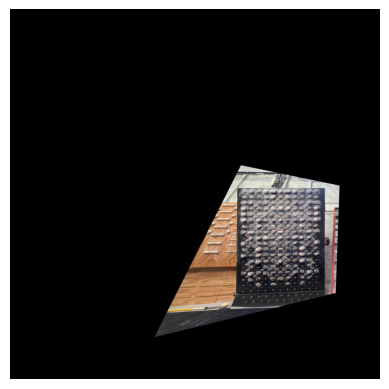

Homography: 
 [[-1.07835470e+01  5.04951120e-01  5.82575600e+03]
 [-6.11199542e+00 -6.24019003e-01  1.81671369e+03]
 [-5.58802582e-03  3.94484323e-04  1.00000000e+00]]


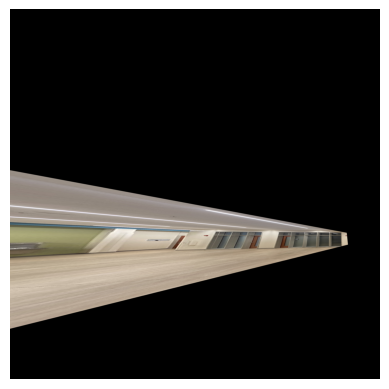

Homography: 
 [[ 3.28716457e-01 -8.39899039e-02  2.02465396e+02]
 [-3.92828083e-02  6.93198757e-01  4.48572996e+01]
 [-3.92149183e-04 -1.01986257e-04  1.00000000e+00]]


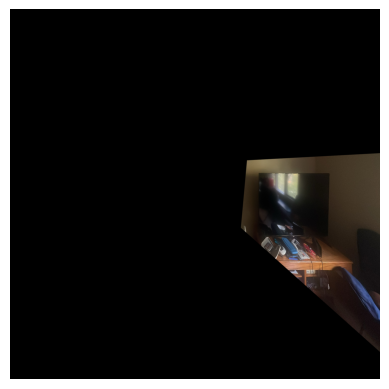

Homography: 
 [[ 5.17765597e-01 -1.98201499e-01  2.10149158e+02]
 [-5.30346427e-02  5.51301857e-01  1.67629483e+02]
 [-2.98743719e-04 -1.87325876e-04  1.00000000e+00]]


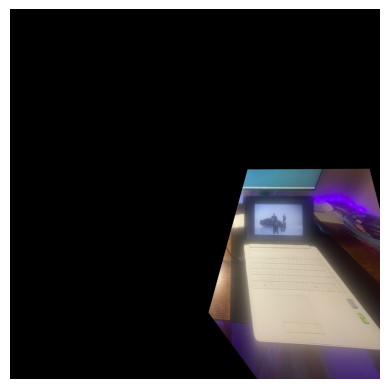

In [23]:
img = mpimg.imread('HW3_images/board_1.jpeg')

# Coordinates of point P,Q,R,S on Image 1
p = (70,420)
q = (422,1759)
r = (1356,1952)
s = (1222,139)
# Coordinates of point P,Q,R,S on Image 1 (undistorted)
p_prima = (70,420)
q_prima = (70,1804)
s_prima = (1255,420)
r_prima = (1255,1804)

pqrs = [p[0], p[1], q[0], q[1], r[0], r[1], s[0], s[1]]
pqrs_prima1 = [p_prima[0], p_prima[1], q_prima[0], q_prima[1], r_prima[0], r_prima[1], s_prima[0], s_prima[1]]
h = obtain_h(pqrs, pqrs_prima1)
print("Homography: \n",h)
img_corrected = project(img,h, new_img_dims=(5000, 5000, -2000, -3000))

img = mpimg.imread('HW3_images/corridor.jpeg')

# Coordinates of point P,Q,R,S on Image 2
p = (829,576)
q = (843,1060)
r = (1301,1339)
s = (1304,490)
# Coordinates of point P,Q,R,S on Image 2 (undistorted)
p_prima = (829,1060)
q_prima = (829,1214)
s_prima = (1311,1060)
r_prima = (1311,1214)

pqrs = [p[0], p[1], q[0], q[1], r[0], r[1], s[0], s[1]]
pqrs_prima1 = [p_prima[0], p_prima[1], q_prima[0], q_prima[1], r_prima[0], r_prima[1], s_prima[0], s_prima[1]]
h = obtain_h(pqrs, pqrs_prima1)
print("Homography: \n",h)
img_corrected = project(img,h, new_img_dims=(5000, 5000, -2000, -3000))

img = mpimg.imread('HW3_images/tele.jpeg')
# Coordinates of point P,Q,R,S on Image 3
p = (364,215)
q = (448,1060)
r = (1271,672)
s = (1301,156)
# Coordinates of point P,Q,R,S on Image 3 (undistorted)
p_prima = (364,215)
q_prima = (364,1064)
s_prima = (1302,215)
r_prima = (1302,1064)

pqrs = [p[0], p[1], q[0], q[1], r[0], r[1], s[0], s[1]]
pqrs_prima1 = [p_prima[0], p_prima[1], q_prima[0], q_prima[1], r_prima[0], r_prima[1], s_prima[0], s_prima[1]]
h = obtain_h(pqrs, pqrs_prima1)
print("Homography: \n",h)
img_corrected = project(img,h, new_img_dims=(5000, 5000, -2000, -3000))

img = mpimg.imread('HW3_images/ordinador.jpeg')
# Coordinates of point P,Q,R,S on Image 4
p = (309,639)
q = (401,1039)
r = (941,851)
s = (932,511)
# Coordinates of point P,Q,R,S on Image 4 (undistorted)
p_prima = (309,639)
q_prima = (309,1049)
s_prima = (945,639)
r_prima = (945,1049)

pqrs = [p[0], p[1], q[0], q[1], r[0], r[1], s[0], s[1]]
pqrs_prima1 = [p_prima[0], p_prima[1], q_prima[0], q_prima[1], r_prima[0], r_prima[1], s_prima[0], s_prima[1]]
h = obtain_h(pqrs, pqrs_prima1)
print("Homography: \n",h)
img_corrected = project(img,h, new_img_dims=(5000, 5000, -2000, -3000))

# Two steps

In [24]:
def draw_parallel_lines(image,x,y):
    
    # Display the image
    fig = plt.imshow(image)
    
    # Draw lines and label corners in white as P,Q,R,S
    plt.plot(x[0:2],y[0:2],color="red")
    plt.plot(x[2:4],y[2:4],color="red")
    plt.plot(x[4:6],y[4:6],color="blue")
    plt.plot(x[6:8],y[6:8],color="blue")
    plt.text(x[0],y[0],'P1',horizontalalignment='left',color='white',fontsize=12)
    plt.text(x[1],y[1],'P2',horizontalalignment='right',color='white',fontsize=12)
    plt.text(x[2],y[2],'P3',horizontalalignment='left',color='white',fontsize=12)
    plt.text(x[3],y[3],'P4',horizontalalignment='left',color='white',fontsize=12)
    plt.text(x[4],y[4],'P5',horizontalalignment='left',color='white',fontsize=12)
    plt.text(x[5],y[5],'P6',horizontalalignment='right',color='white',fontsize=12)
    plt.text(x[6],y[6],'P7',horizontalalignment='left',color='white',fontsize=12)
    plt.text(x[7],y[7],'P8',horizontalalignment='left',color='white',fontsize=12)
    plt.axis('off')
    plt.show()
    

In [101]:

def projective_homography(points, image):
    # Extract x and y coordinates from points
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    
    # Compute lines between pairs of points
    lines = []
    for i in range(0, len(points), 2):  # Pairs of points: (1,2), (3,4), (5,6), (7,8)
        line = np.cross(points[i], points[i+1]).astype(np.float64)  # Ensure float64 dtype
        line /= line[2]  # Normalize the line
        lines.append(line)
    
    # Compute vanishing points by crossing pairs of lines
    vanishing_points = []
    for i in range(0, len(lines), 2):  # Pairs of lines: (1,2), (3,4)
        vanishing_point = np.cross(lines[i], lines[i+1]).astype(np.float64)  # Ensure float64 dtype
        vanishing_point /= vanishing_point[2]  # Normalize the vanishing point
        vanishing_points.append(vanishing_point)
    
    # Compute vanishing line by crossing the two vanishing points
    vanishing_line = np.cross(vanishing_points[0], vanishing_points[1]).astype(np.float64)  # Ensure float64 dtype
    vanishing_line /= vanishing_line[2]  # Normalize the vanishing line

    # Construct the projective homography matrix using the vanishing line
    homography_projective = np.array([
        [1, 0, 0],
        [0, 1, 0],
        [vanishing_line[0], vanishing_line[1], vanishing_line[2]]
    ], dtype=np.float64)  # Ensure float64 dtype

    # Compute the inverse of the homography for distortion correction
    homography_projective_distortion = np.linalg.inv(homography_projective)

    return homography_projective_distortion


In [104]:
def affine_homography(points_ori, image,point_pairs,homography_projective_distortion):
    
    # Initialize lists for transformed coordinates with direct array initialization
    x, y = [], []

    # Apply inverse homography and append transformed x and y coordinates for each point
    for point in points_ori:
        transformed_point = np.dot(np.linalg.inv(homography_projective_distortion), np.transpose(np.array(point)))
        x.append(transformed_point[0] / transformed_point[2])  # Normalize by third coordinate
        y.append(transformed_point[1] / transformed_point[2])

    # Rearrange x and y coordinates slightly differently for greater generality
    x = [x[0], x[1], x[0], x[2], x[3], x[4], x[3], x[5]]
    y = [y[0], y[1], y[0], y[2], y[3], y[4], y[3], y[5]]
    
    # Compute the cross products using a list comprehension
    cross_products = [np.cross(p1, p2) for p1, p2 in point_pairs]
    
    # Unpack the cross products into variables
    l_dash, m_dash, l_dash_dash, m_dash_dash = cross_products

    # Extract coefficients for the line equations
    l1_dash, l2_dash = l_dash[0], l_dash[1]
    m1_dash, m2_dash = m_dash[0], m_dash[1]

    l1_dash_dash, l2_dash_dash = l_dash_dash[0], l_dash_dash[1]
    m1_dash_dash, m2_dash_dash = m_dash_dash[0], m_dash_dash[1]
    
    # Construct the A matrix using perpendicular line equations
    A = np.array([
        [l1_dash * m1_dash, l1_dash * m2_dash + l2_dash * m1_dash, l2_dash * m2_dash],
        [l1_dash_dash * m1_dash_dash, l1_dash_dash * m2_dash_dash + l2_dash_dash * m1_dash_dash, l2_dash_dash * m2_dash_dash]
    ])
    
    # Find the solution for Ax=0, i.e., the nullspace of A
    s = null_space(A).flatten()  # Ensure s is flattened to a 1D array
    
    # Normalize s to avoid division by zero
    if s[-1] != 0:
        s = s / s[-1]  # Normalize the last element
    
    # Construct the S matrix from the solution vector
    if len(s) >= 3:  # Ensure s has at least 3 elements to construct S
        S = np.array([
            [s[0] / s[2], s[1] / s[2]],
            [s[1] / s[2], 1]
        ])
    else:
        raise ValueError("The null space solution vector is too short to construct the S matrix.")

    # Perform SVD on the S matrix
    U, Sigma, V_transpose = np.linalg.svd(S)
    
    # Rebuild the affine transformation matrix A from the singular values
    A_affine = np.dot(U, np.dot(np.diag(np.sqrt(Sigma)), V_transpose))
    
    # Construct the affine homography matrix
    H_affine = np.array([
        [A_affine[0, 0], A_affine[0, 1], 0],
        [A_affine[1, 0], A_affine[1, 1], 0],
        [0, 0, 1]
    ])
    
    return H_affine


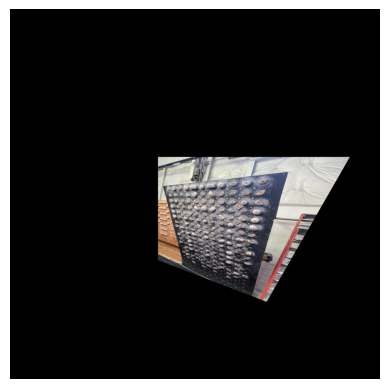

ValueError: too many values to unpack (expected 2)

<Figure size 640x480 with 0 Axes>

In [105]:
img1 = mpimg.imread('HW3_images/board_1.jpeg')

#projective homography
points = [(70,420,1),(1222,139,1),(422,1759,1),(1356,1952,1),(422,1759,1),(70,420,1),(1356,1952,1),(1222,139,1)]
homography_projective_distortion = projective_homography(points,img1)
plt.figure()
project(img1,homography_projective_distortion, new_img_dims=(5000, 5000, -2000, -2000))

plt.figure()
points_o = [(544,368,1),(591,583,1),(841,307,1),(895,647,1),(877,536,1),(602,687,1)]
h_a = affine_homography(points_o,img1,points,
                                                         homography_projective_distortion)

    
homography_affine_distortion = np.matmul(homography_projective_distortion,h_a)
project(img1,np.linalg.inv(homography_affine_distortion), new_img_dims=(5000, 5000, -1500, -3000))

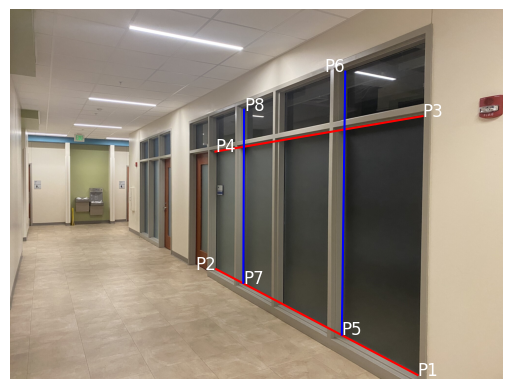

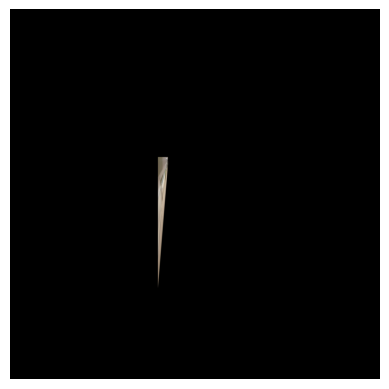

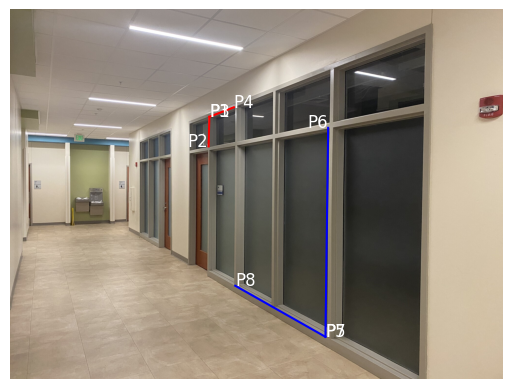

/tmp/ipykernel_1637231/4234177922.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S = np.matrix([[float(s[0])/float(s[2]),float(s[1])/float(s[2])],
/tmp/ipykernel_1637231/4234177922.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [float(s[1])/float(s[2]),1]])


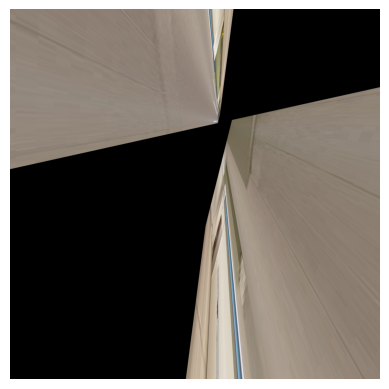

array([[[140, 128, 116],
        [140, 128, 116],
        [140, 128, 116],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[140, 128, 116],
        [140, 128, 116],
        [140, 128, 116],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[140, 128, 116],
        [140, 128, 116],
        [140, 128, 116],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [142, 128, 115],
        [142, 128, 115],
        [142, 128, 115]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [142, 128, 115],
        [142, 128, 115],
        [142, 128, 115]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [142, 128, 115],
        [142, 128, 115],
        [142, 128, 115]]

In [62]:
img1 = mpimg.imread('HW3_images/corridor.jpeg')
#The 2 lines are parallel
# first line
#2 parallel lines
#line 1
point_1 = (1667,1496,1)
point_2 = (843,1063,1)
#line 2
point_3 = (1687,437,1)
point_4 = (840,582,1)

#2 parallel lines
#line 1
point_5 = (1357,1331,1)
point_6 = (1371,255,1)
#line2
point_7 = (954,1119,1)
point_8 = (957,411,1)

#projective homography
homography_projective_distortion = compute_projective_homography([point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8],img1)
plt.figure()
plt.axis('off')
project(img1,homography_projective_distortion, new_img_dims=(5000, 5000, -2000, -2000))

#Afine homography    
point_1_ori = (815,439,1)
point_2_ori = (812,560,1)
point_3_ori = (915,400,1)

point_4_ori = (1290,1339,1)
point_5_ori = (1301,484,1)
point_6_ori = (921,1130,1)

plt.figure()
plt.axis('off')
homography_affine_distortion = compute_affine_homography([point_1_ori,point_2_ori,point_3_ori,point_4_ori,
                                                         point_5_ori,point_6_ori],img1,point_1,point_2,
                                                         point_3,point_4,point_5,point_6,point_7,point_8,
                                                         homography_projective_distortion)


    
homography_affine_distortion = np.matmul(homography_projective_distortion,homography_affine_distortion)
project(img1,np.linalg.inv(homography_affine_distortion), new_img_dims=(5000, 5000, -1500, -3000))

# One step

In [92]:
def one_step(points, image):
    # points should be a list of 15 3D points.
    
    # Compute cross products for 5 pairs of perpendicular lines
    lines = []
    for i in range(0, 15, 3):
        l = np.cross(points[i], points[i+1])
        m = np.cross(points[i], points[i+2])
        # Normalize by the third coordinate (homogeneous coordinates)
        l = l / l[2]
        m = m / m[2]
        lines.append((l, m))

    # Construct the A and B matrices
    A = []
    B = []
    for l, m in lines:
        A.append([l[0] * m[0], 0.5 * (l[1] * m[0] + l[0] * m[1]), l[1] * m[1], 0.5 * (l[2] * m[0] + l[0] * m[2]), 0.5 * (l[2] * m[1] + l[1] * m[2])])
        B.append([-l[2] * m[2]])

    A = np.matrix(A)
    B = np.matrix(B)

    # Solve for the conic coefficients
    conic_coefficients = np.linalg.inv(A) @ B
    conic_coefficients = conic_coefficients / np.amax(conic_coefficients)

    # Compute the conic matrix
    conic_matrix = np.matrix([[float(conic_coefficients[0]), float(conic_coefficients[1]) / 2, float(conic_coefficients[3]) / 2],
                              [float(conic_coefficients[1]) / 2, float(conic_coefficients[2]), float(conic_coefficients[4]) / 2],
                              [float(conic_coefficients[3]) / 2, float(conic_coefficients[4]) / 2, 1]])

    # Compute A*A^T and Av for later use
    A_A_transpose_matrix = np.matrix([[float(conic_coefficients[0]), float(conic_coefficients[1]) / 2],
                                      [float(conic_coefficients[1]) / 2, float(conic_coefficients[2])]])
    A_A_transpose_matrix = A_A_transpose_matrix / np.amax(A_A_transpose_matrix)
    A_v_matrix = np.matrix([[float(conic_coefficients[3]) / 2], [float(conic_coefficients[4]) / 2]])

    # Derive A from A*A^T using SVD
    U_matrix, Sigma_matrix, V_transpose_matrix = np.linalg.svd(A_A_transpose_matrix)
    A = U_matrix @ np.diag(np.sqrt(Sigma_matrix)) @ V_transpose_matrix

    # Derive v using A and Av
    v_vector = np.linalg.inv(A) @ A_v_matrix

    # Construct the homography matrix
    homography_matrix = np.matrix([[A[0, 0], A[0, 1], 0],
                                   [A[1, 0], A[1, 1], 0],
                                   [float(v_vector[0]), float(v_vector[1]), 1]])

    return homography_matrix



/tmp/ipykernel_1637231/3176305773.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C_star_dash = np.matrix([[float(sol[0]), float(sol[1]) / 2, float(sol[3]) / 2],
/tmp/ipykernel_1637231/3176305773.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [float(sol[1]) / 2, float(sol[2]), float(sol[4]) / 2],
/tmp/ipykernel_1637231/3176305773.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [float(sol[3]) / 2, float(sol[4]) / 2, 1]])
/tmp/ipykernel_1637231/317630

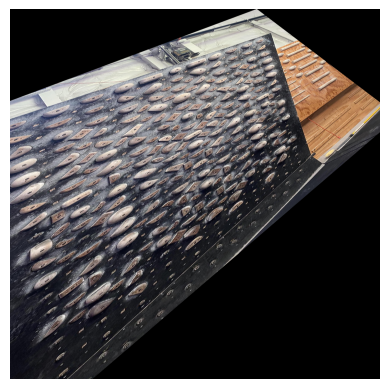

In [95]:
img = mpimg.imread('HW3_images/board_1.jpeg')

points = [(978,1335,1), (952,1159,1), (723,1321,1), (519,1474,1), (748,1492,1), (483,1317,1), (1074,250,1), (730,325,1), (1103,619,1), (1000,636,1), (1021,851,1), (1103,619,1), (451,386,1), (734,325,1), (512,701,1)]
plt.figure()
h = one_step(points,img1)
project(img, np.linalg.inv(h), new_img_dims=(6000, 6000, 0, -4000))


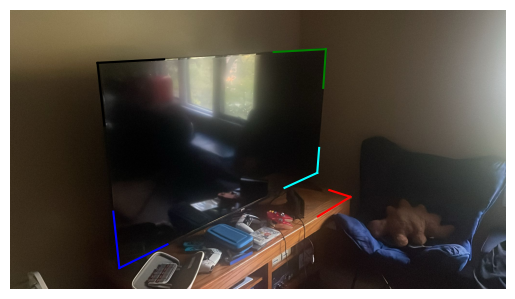

/tmp/ipykernel_1637231/3795427224.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C_star_dash = np.matrix([[float(sol[0]),float(sol[1])/2,float(sol[3])/2],
/tmp/ipykernel_1637231/3795427224.py:95: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [float(sol[1])/2,float(sol[2]),float(sol[4])/2],
/tmp/ipykernel_1637231/3795427224.py:96: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [float(sol[3])/2,float(sol[4])/2,1]])
/tmp/ipykernel_1637231/3795427224.py:97: Deprec

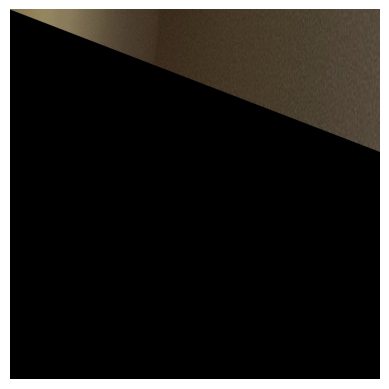

In [78]:
img1 = mpimg.imread('HW3_images/tele.jpeg')

point_1 = (361,218,1)
point_2 = (389,476,1)
point_3 = (636,203,1)

point_4 = (451,1065,1)
point_5 = (650,967,1)
point_6 = (426,832,1)

point_7 = (1304,161,1)
point_8 = (1293,321,1)
point_9 = (1088,173,1)

point_10 = (1268,672,1)
point_11 = (1133,734,1)
point_12 = (1276,569,1)

point_13 = (1405,771,1)
point_14 = (1318,743,1)
point_15 = (1271,852,1)

x = [point_1[0],point_2[0],point_1[0],point_3[0],point_4[0],point_5[0],point_4[0],point_6[0],
     point_7[0],point_8[0],point_7[0],point_9[0],point_10[0],point_11[0],point_10[0],point_12[0],
     point_13[0],point_14[0],point_13[0],point_15[0]] 
y = [point_1[1],point_2[1],point_1[1],point_3[1],point_4[1],point_5[1],point_4[1],point_6[1],
     point_7[1],point_8[1],point_7[1],point_9[1],point_10[1],point_11[1],point_10[1],point_12[1],
     point_13[1],point_14[1],point_13[1],point_15[1]] 

new_img_dims=(10000, 10000, -2000, -8000)
 
draw_parallel_lines_one_step(img1,x,y)
plt.figure()
plt.axis('off')
H = remove_distortion_one_step(point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,
                               point_9,point_10,point_11,point_12,point_13,point_14,point_15,img1, new_img_dims=(6000, 6000, 0, 0))

In [81]:
def calculate_line_through_points(point1, point2):
    p1_hom = np.array([point1[0], point1[1], 1])
    p2_hom = np.array([point2[0], point2[1], 1])
    line = np.cross(p1_hom, p2_hom)
    
def compute_dual_conic(lines):
    A = np.zeros((5, 5), dtype=float)
    b = np.zeros(5, dtype=float)
    for i in range(3):
        A[i] = [lines[i][0] * lines[i + 1][0],
        lines[i][1] * lines[i + 1][0] + lines[i][0] * lines[i +
        1][1],
        lines[i][1] * lines[i + 1][1],
        lines[i][2] * lines[i + 1][0] + lines[i][0] * lines[i +
        1][2],
        lines[i][2] * lines[i + 1][1] + lines[i][1] * lines[i +
        1][2]]
        b[i] =-lines[i][2] * lines[i + 1][2]
    A[3] = [lines[3][0] * lines[0][0],
    lines[3][1] * lines[0][0] + lines[3][0] * lines[0][1],
    lines[3][1] * lines[0][1],
    lines[3][2] * lines[0][0] + lines[3][0] * lines[0][2],
    lines[3][2] * lines[0][1] + lines[3][1] * lines[0][2]]
    b[3] =-lines[3][2] * lines[0][2]
    A[4] = [lines[4][0] * lines[5][0],
    lines[4][1] * lines[5][0] + lines[4][0] * lines[5][1],
    lines[4][1] * lines[5][1],
    lines[4][2] * lines[5][0] + lines[4][0] * lines[5][2],
    lines[4][2] * lines[5][1] + lines[4][1] * lines[5][2]]
    b[4] =-lines[4][2] * lines[5][2]
    dual_conic = np.linalg.solve(A, b)
    return dual_conic

def perform_one_step_correction(points, image, scale_factor=1):
    # Perform one-step correctio

    lines = [
        calculate_line_through_points(points[i], points[(i + 1) % 4]) for i in range(4)
    ] + [
        calculate_line_through_points(points[1], points[3]),
        calculate_line_through_points(points[0], points[2])
    ]

    dual_conic = compute_dual_conic(lines)
    u, s, vh = np.linalg.svd([[dual_conic[0], dual_conic[1]], [dual_conic[1], dual_conic[2]]])
    sqrt_eigenvalues = np.sqrt(np.diag(s))
    transformation_matrix = vh @ sqrt_eigenvalues @ vh.T
    affine_vector = np.linalg.inv(transformation_matrix) @ np.array([dual_conic[3], dual_conic[4]])
    combined_homography = np.eye(3)
    combined_homography[:2, :2] = transformation_matrix
    combined_homography[2, :2] = affine_vector
    project(image, np.linalg.inv(combined_homography), scale_factor)
    np.set_printoptions(suppress=True)
    print(f'Homography for:\n', np.linalg.inv(combined_homography) / np.linalg.inv(combined_homography)[2, 2])
    np.set_printoptions(suppress=False)


IndentationError: expected an indented block after function definition on line 6 (1009600847.py, line 7)

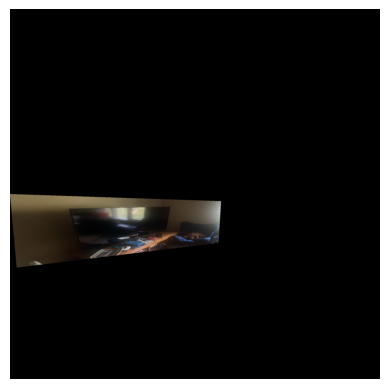

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [91]:
def one_step_calculate_H(points):
    # points PQRS, new_PQR 7 points total, vectorized operation in this step
    points = np.asarray(points)
    points = np.insert(points,2,1,axis=1)
    PQ = np.cross(points[0], points[1])
    QR = np.cross(points[1], points[2])
    RS = np.cross(points[2], points[3])
    PS = np.cross(points[3], points[0])
    PQ_new = np.cross(points[4], points[5])
    QR_new = np.cross(points[5], points[6])
    l_lines = np.asarray([PQ,QR,RS,PS,PQ_new])
    m_lines = np.asarray([QR,RS,PS,PQ,QR_new])
    l_lines = np.divide(l_lines.T,l_lines[:,2]).T # calculate the l lines with z = 1
    m_lines = np.divide(m_lines.T,m_lines[:,2]).T # calculate the m lines with z = 1
    A = np.zeros((5,5))
    A[:,0] = np.multiply(l_lines[:,0],m_lines[:,0])
    A[:,1] = np.multiply(m_lines[:,1],l_lines[:,0]) + np.multiply(m_lines[:,0],l_lines[:,1])
    A[:,2] = np.multiply(l_lines[:,1], m_lines[:,1])
    A[:,3] = l_lines[:,0] + m_lines[:,0]
    A[:,4] = l_lines[:,1] + m_lines[:,1]
    DC_vec = np.ndarray.flatten(np.dot(np.linalg.pinv(A),-np.ones((5,1))))
    DC_vec = DC_vec/np.max(DC_vec)
    DC = np.ones((3, 3))
    DC[0,0:2] = DC_vec[0:2]
    DC[0,2] = DC_vec[3]
    DC[1,0:2] = DC_vec[1:3]
    DC[1,2] = DC_vec[4]
    DC[2,0:2] = DC_vec[3:5]
    H = np.zeros((3, 3))
    V, D_square, V_T = np.linalg.svd(DC[0:2,0:2])
    D = np.sqrt(np.diag(D_square))
    A_matrix = np.dot(np.dot(V, D), V.transpose())
    H[0:2,0:2] = A_matrix
    v = np.dot(np.linalg.pinv(A_matrix),DC[0:2,2])
    H[2,0:2] = v.transpose()
    H[2,2] = 1
    H = np.linalg.inv(H)
    return H

img1 = mpimg.imread('HW3_images/tele.jpeg')

# one-step method
building_one_step_points = [[362, 219], [403, 1062], [1262, 676], [1305, 162],[451,1057],[346, 70], [1322, 67]]# H_one_step_building = one_step_calculate_H(building_one_step_points)
H = one_step_calculate_H(building_one_step_points)
# image = building.copy()
# for i in [(237, 196), (232, 370), (295, 375), (301, 213),(232,378),(240,124),(716,291)]
# image = cv2.circle(image, i, radius=0, color=(0, 0, 255), thickness=6)
# cv2.imwrite("building_one_step_PQRSQPS.jpg",image)

project(img1,np.linalg.inv(H),new_img_dims=(2000, 2000, -1000, 0))
